In [1]:
# Python 3.8.12  

import pandas as pd
import numpy as np
from skimage import data
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings("ignore")


In [2]:
rocket_image = data.rocket()

In [3]:
rocket_image

array([[[ 17,  33,  58],
        [ 17,  33,  58],
        [ 17,  33,  59],
        ...,
        [  8,  19,  37],
        [  8,  19,  37],
        [  7,  18,  36]],

       [[ 17,  33,  58],
        [ 17,  33,  58],
        [ 17,  33,  59],
        ...,
        [  8,  19,  37],
        [  8,  19,  37],
        [  8,  19,  37]],

       [[ 18,  34,  59],
        [ 18,  34,  59],
        [ 18,  34,  60],
        ...,
        [  8,  19,  37],
        [  8,  19,  37],
        [  8,  19,  37]],

       ...,

       [[ 27,  28,  32],
        [ 29,  29,  37],
        [ 20,  24,  36],
        ...,
        [136, 106,  82],
        [186, 136,  85],
        [173, 119,  81]],

       [[ 26,  27,  31],
        [ 29,  32,  39],
        [ 30,  34,  46],
        ...,
        [103,  67,  45],
        [ 97,  61,  27],
        [ 76,  49,  20]],

       [[ 26,  27,  31],
        [ 29,  32,  39],
        [ 40,  46,  60],
        ...,
        [ 82,  53,  37],
        [ 79,  50,  32],
        [ 83,  61,  37]]

In [4]:
def show_image(image, title='Image', cmap_type='gray'):
    plt.imshow(image, cmap=cmap_type)
    plt.title(title)
    plt.axis('off')
    plt.show()

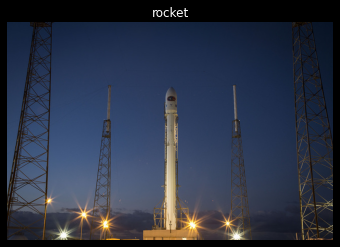

In [5]:
show_image(rocket_image, 'rocket')

In [6]:
from skimage.color import rgb2gray
rocket_image_gray = rgb2gray(rocket_image)


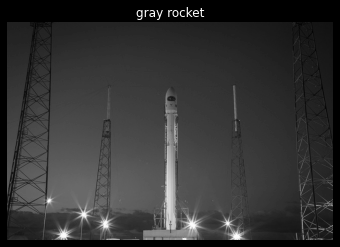

In [7]:
show_image(rocket_image_gray, 'gray rocket')

In [8]:
red = rocket_image[:, :, 0]
green = rocket_image[:, :, 1]
blue = rocket_image[:, :, 2]

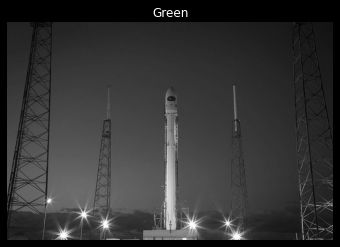

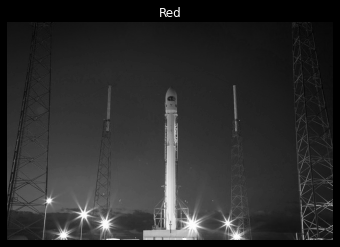

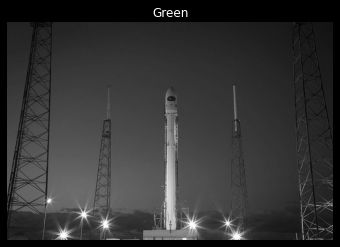

In [72]:
show_image(green, 'Green')
show_image(red, 'Red')
show_image(green, 'Green')

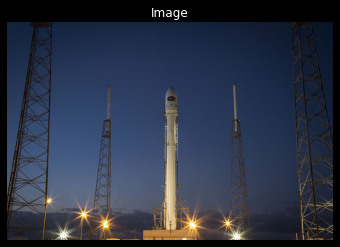

In [9]:
show_image(rocket_image)

In [10]:
# 
# img = plt.imread('/.jpeg')

In [11]:
rocket_image_flipp = np.flipud(rocket_image)

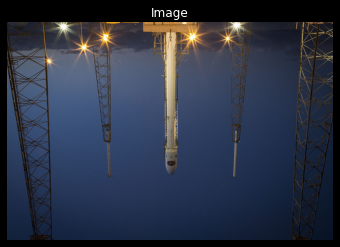

In [12]:
show_image(rocket_image_flipp)

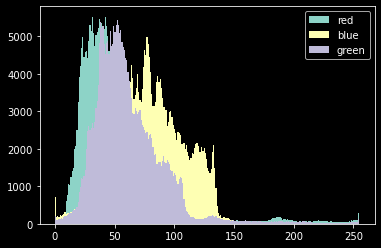

In [13]:
plt.hist(red.ravel(), bins=256)
plt.hist(blue.ravel(), bins=256)
plt.hist(green.ravel(), bins=256)
plt.legend(['red', 'blue', 'green'])
plt.show()

# Ravel retorna uma matriz cpntinua dos valores da cor da imagem
# Definimos bins como 256 porque mostraremos o número de pixels para cada valor de pixel.

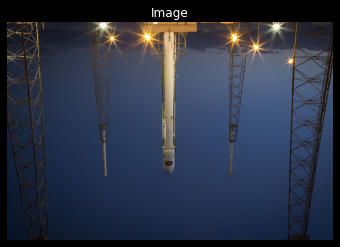

In [14]:
rocket_image_flipp_plr = np.fliplr(rocket_image_flipp)
show_image(rocket_image_flipp_plr)

In [15]:
# Estudar esses metodos mais a  fundo
from skimage.filters import try_all_threshold
from skimage.filters import threshold_otsu
from skimage.filters import threshold_local

In [16]:
img_peste = plt.imread('./images.jfif')
img_normal = plt.imread('./imagens_normal.jpg')
img_peste_cafe = plt.imread('./imagens_praga.png')

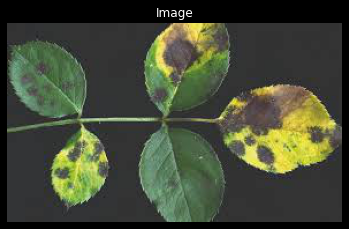

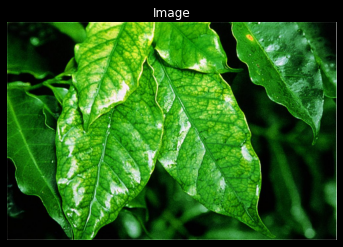

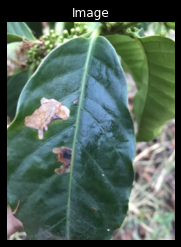

In [17]:
show_image(img_peste)
show_image(img_normal)
show_image(img_peste_cafe)

In [18]:
img_peste_gray = rgb2gray(img_peste)
img_normal_cafe_gray = rgb2gray(img_normal)
img_peste_cafe_gray = rgb2gray(img_peste_cafe)

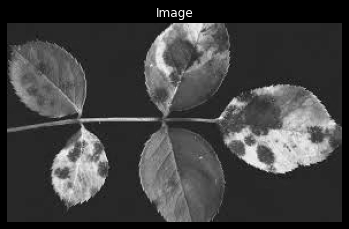

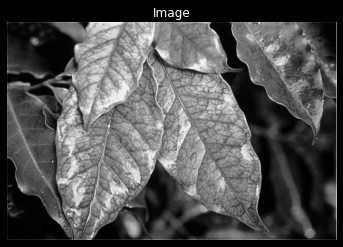

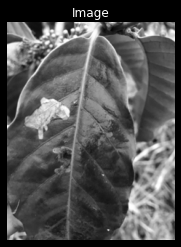

In [19]:
show_image(img_peste_gray)
show_image(img_normal_cafe_gray)
show_image(img_peste_cafe_gray)

In [20]:
# binary global
thresh_leaf_normal = threshold_otsu(img_peste_gray)
thresh_leaf_cafe = threshold_otsu(img_normal_cafe_gray)
thresh_leaf_cafe_pest = threshold_otsu(img_peste_cafe_gray)
binary1 = img_peste_gray > thresh_leaf_normal
binary2 = img_normal_cafe_gray > thresh_leaf_cafe
binary3 = img_peste_cafe_gray >  thresh_leaf_cafe_pest

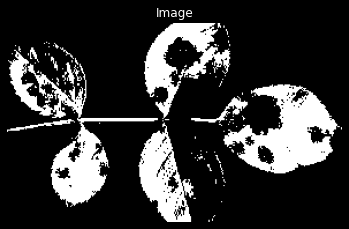

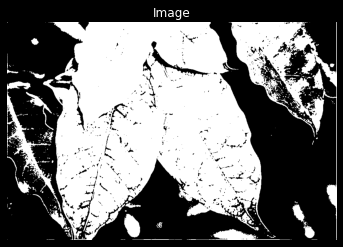

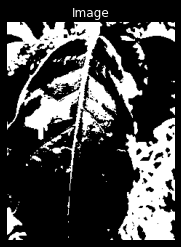

In [21]:
show_image(binary1)
show_image(binary2)
show_image(binary3)

In [22]:
# por outro lado 
thresh_leaf_normal = threshold_otsu(img_peste_gray)
thresh_leaf_cafe = threshold_otsu(img_normal_cafe_gray)
thresh_leaf_cafe_pest = threshold_otsu(img_peste_cafe_gray)
binary1 = img_peste_gray < thresh_leaf_normal
binary2 = img_normal_cafe_gray < thresh_leaf_cafe
binary3 = img_peste_cafe_gray < thresh_leaf_cafe_pest

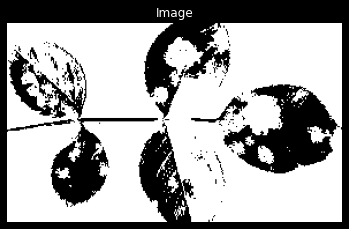

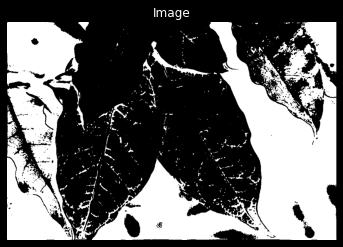

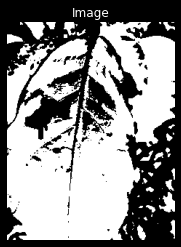

In [23]:
show_image(binary1)
show_image(binary2)
show_image(binary3)


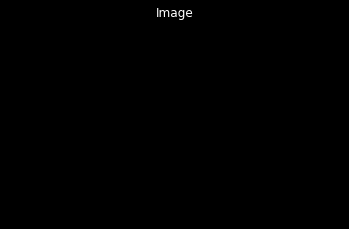

' \n    Funciona melhor em imagens escritas\n'

In [24]:
# local
block_size = 35
local_thresh = threshold_local(img_peste_gray, block_size, offset=10)
binary4 = img_peste_gray < local_thresh
show_image(binary4)

''' 
    Funciona melhor em imagens escritas
'''

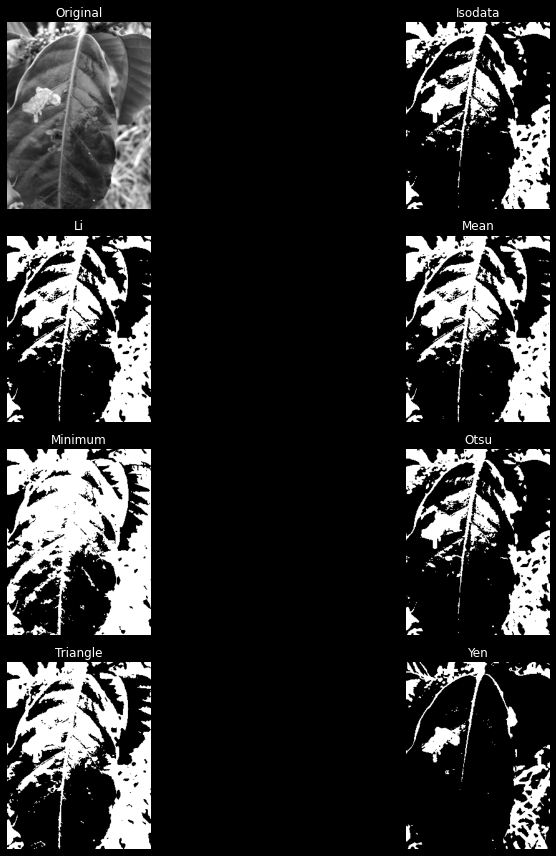

In [25]:
''' 
    Testar todos os metodos do threshold
'''
fig, ax = try_all_threshold(img_peste_cafe_gray, verbose=False, figsize=(15,12))
plt.show()


In [26]:
def plot_comparison(original, filtered, title_filtered):
    fig, (ax1, ax2) = plt.subplots(ncols = 2 , figsize=(12,6), sharex=True, sharey=True)
    ax1.imshow(original, cmap=plt.cm.gray)
    ax1.axis('off')
    ax2.imshow(filtered, cmap=plt.cm.gray)
    ax2.set_title(title_filtered)
    ax2.axis('off')

In [27]:
from skimage.filters import gaussian

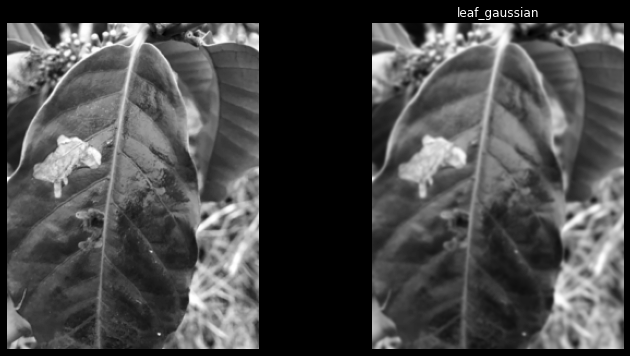

In [28]:
# False se a imagem tiver gray
gaussian_leaf = gaussian(img_peste_cafe_gray, multichannel=False)
plot_comparison(img_peste_cafe_gray, gaussian_leaf, 'leaf_gaussian')


In [29]:
from skimage.filters import sobel

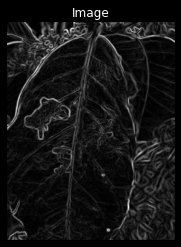

In [30]:
sobel_img = sobel(img_peste_cafe_gray)
show_image(sobel_img)


In [31]:
from skimage import exposure


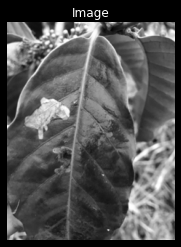

In [32]:
show_image(img_peste_cafe_gray)

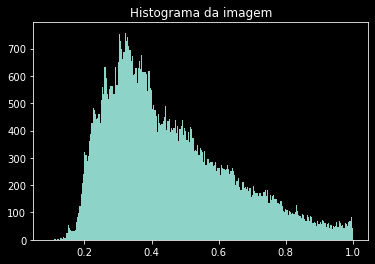

In [33]:
plt.title('Histograma da imagem')
plt.hist(img_peste_cafe_gray.ravel(), bins=256)
plt.show()
# função ravel() retorna um array continuo #

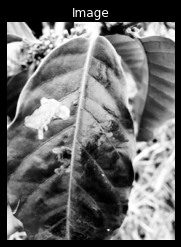

In [34]:
img_peste_cafe_gray_hist = exposure.equalize_hist(img_peste_cafe_gray)
show_image(img_peste_cafe_gray_hist)


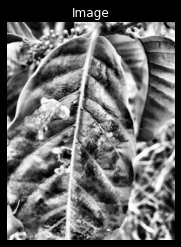

In [35]:
img_peste_cafe_gray_hist_adap = exposure.equalize_adapthist(img_peste_cafe_gray, clip_limit=0.03)
show_image(img_peste_cafe_gray_hist_adap)


In [36]:
#rocket_image
from skimage.transform import rotate, rescale

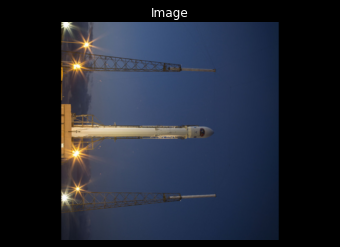

In [37]:
rocket_image_rotate = rotate(rocket_image, -90)
show_image(rocket_image_rotate)

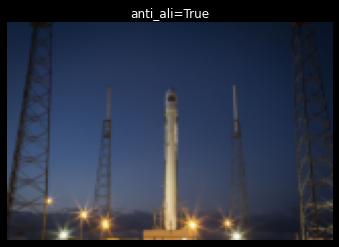

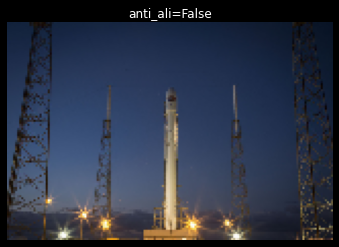

In [38]:
rescale_rocket = rescale(rocket_image, 1/4, anti_aliasing=True, multichannel=True)
rescale_rocket_notanti = rescale(rocket_image, 1/4, anti_aliasing=False, multichannel=True)
show_image(rescale_rocket, 'anti_ali=True')
show_image(rescale_rocket_notanti, 'anti_ali=False')

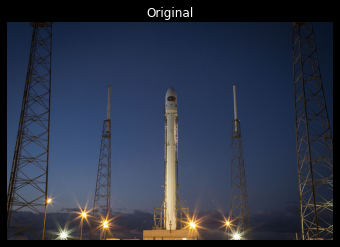

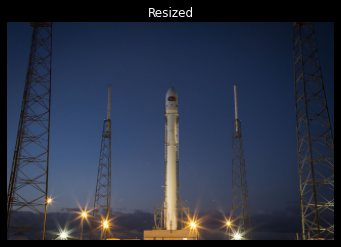

In [39]:
from skimage.transform import resize

height = int(rocket_image.shape[0]/2)
width = int(rocket_image.shape[1]/2)

rocket_resize = resize(rocket_image, (height, width), anti_aliasing=True)

show_image(rocket_image, 'Original')
show_image(rocket_resize, 'Resized')

In [40]:
from skimage import morphology

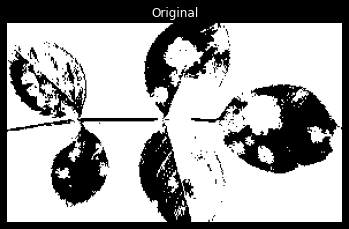

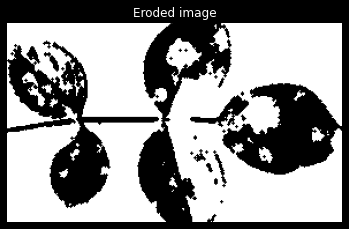

In [41]:
eroded_image = morphology.binary_erosion(binary1)
show_image(binary1, 'Original')
show_image(eroded_image, 'Eroded image')

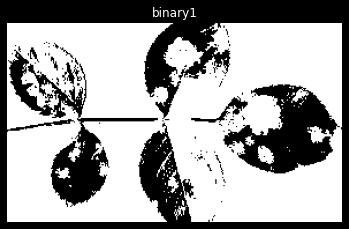

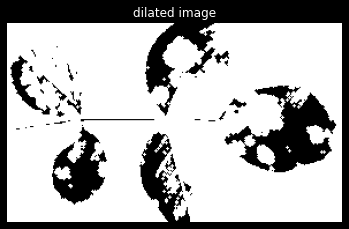

In [42]:
dilated_image = morphology.binary_dilation(binary1)
show_image(binary1, 'binary1')
show_image(dilated_image, 'dilated image')

In [43]:
from skimage.restoration import inpaint

In [44]:
def get_mask(image):
    mask = np.zeros(image.shape[:-''])
    mask[101:106, 0:240] = 1
    mask[152:154, 0:60] = 1
    mask[153:156, 100:120] = 1
    mask[155:156, 120:140] = 1
    mask[212:217, 0:150] = 1
    mask[217:222, 150:256] = 1
    return mask

In [45]:
from skimage.util import random_noise

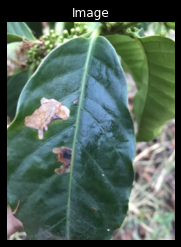

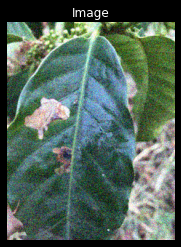

In [46]:
img_random_noisy = random_noise(img_peste_cafe)
show_image(img_peste_cafe)
show_image(img_random_noisy)

In [47]:
from skimage.restoration import denoise_tv_chambolle

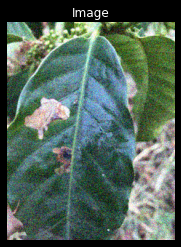

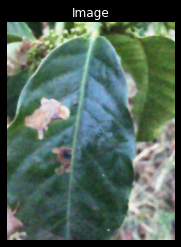

In [48]:
denoise_img = denoise_tv_chambolle(img_random_noisy, multichannel=True)
show_image(img_random_noisy)
show_image(denoise_img)

In [49]:
from skimage.restoration import denoise_bilateral

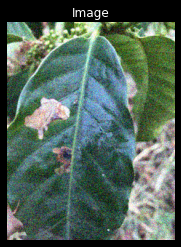

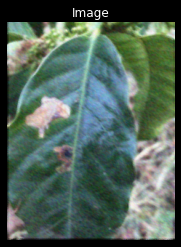

In [50]:
denoised_img_bl = denoise_bilateral(img_random_noisy, multichannel=True)
show_image(img_random_noisy)
show_image(denoised_img_bl)

In [51]:
resolution = denoised_img_bl.shape[0] * denoised_img_bl.shape[1]
resolution

69300

In [52]:
from skimage.segmentation import slic
from skimage.color import label2rgb

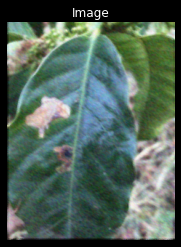

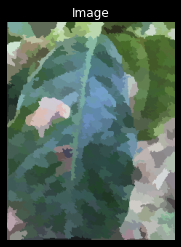

In [53]:
segments = slic(denoised_img_bl, n_segments=400)
segmented_img_bl = label2rgb(segments, denoised_img_bl, kind='avg')
show_image(denoised_img_bl)
show_image(segmented_img_bl)

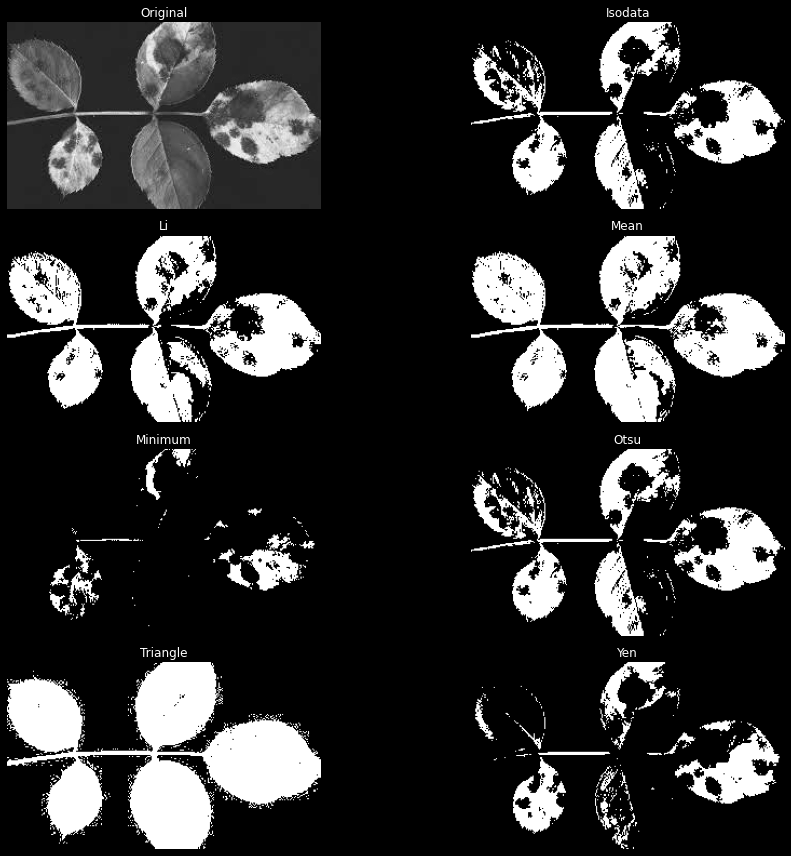

In [54]:
fig, ax = try_all_threshold(img_peste_gray, verbose=False, figsize=(15,12))
plt.show()

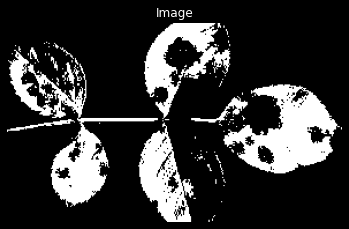

In [55]:
thresh_leaf = threshold_otsu(img_peste_gray)
binary_leaf = img_peste_gray > thresh_leaf_normal
show_image(binary_leaf)

In [56]:
from skimage import measure

contours = measure.find_contours(binary_leaf, 0.8)


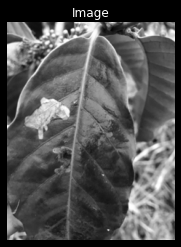

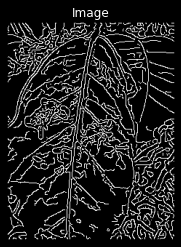

In [57]:
from skimage.feature import canny


canny_img = canny(img_peste_cafe_gray)
show_image(img_peste_cafe_gray)
show_image(canny_img)

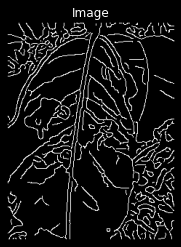

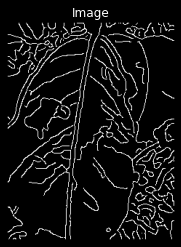

In [58]:
canny_img_1_8 = canny(img_peste_cafe_gray, sigma=1.8)
canny_img_2_2 = canny(img_peste_cafe_gray, sigma=2.2)
show_image(canny_img_1_8)
show_image(canny_img_2_2)


In [59]:
def show_image_with_corners(image, coords, title='Corners detected'):
    plt.imshow(image, interpolation='nearest', cmap='gray')
    plt.title(title)
    plt.plot(coords[:,1], coords[:, 0], '+r', markersize=15)
    plt.axis('off')
    plt.show()

In [60]:
from skimage.feature import corner_harris, corner_peaks

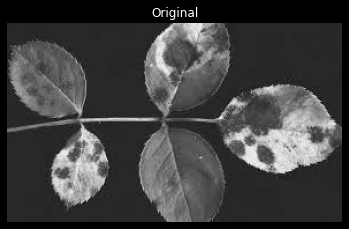

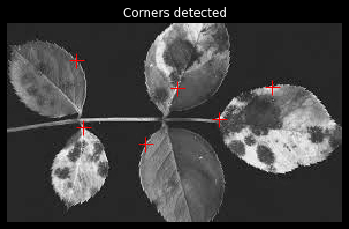

In [61]:
measure_img = corner_harris(img_peste_gray)
coords_img = corner_peaks(measure_img, min_distance=30)
show_image(img_peste_gray, 'Original')
show_image_with_corners(img_peste_gray, coords_img)


In [62]:
coords_w_min_2 = corner_peaks(measure_img, min_distance=6)
print("With a min_distance set to 2, we detect a total", len(coords_w_min_2), "corners in the image.")

With a min_distance set to 2, we detect a total 161 corners in the image.


In [63]:
def show_detected_face(result, detected, title='Face Image'):
    plt.imshow(result)
    img_desc = plt.gca()
    plt.set_cmap('gray')
    plt.title(title)
    plt.axis('off')
    for patch in detected:
        img_desc.add_patch(
            patches.Rectangle(
                (patch['c'], patch['r']),
                patch['width'],
                patch['height'],
                fill=False, color='r', linewidth=2)
        )
    plt.show()

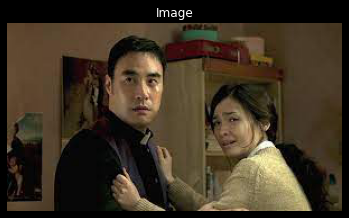

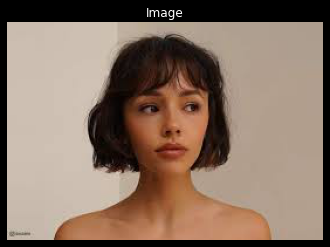

In [64]:
face_img = plt.imread('./Face.jpg')
face_img2 = plt.imread('./images.jpg')
show_image(face_img)
show_image(face_img2)

In [65]:
from skimage.feature import Cascade

trained_file = data.lbp_frontal_face_cascade_filename()
detector = Cascade(trained_file)

In [66]:
detected = detector.detect_multi_scale(img = face_img2, scale_factor = 1.2, step_ratio=1, min_size=(10,10), max_size=(200,200))

In [67]:
print(detected)

[{'r': 36, 'c': 93, 'width': 94, 'height': 94}]


NameError: name 'patches' is not defined

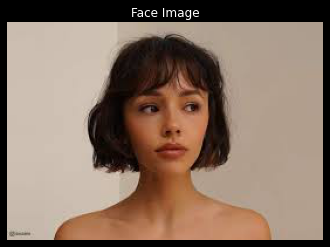

In [68]:
show_detected_face(face_img2, detected)

--------------

In [ ]:
from skimage.feature import Cascade
from skimage.filters import gaussian

In [ ]:
def getFace(d):
    x, y = d['r'], d['c']
    width, height = d['r'] + d['width'], d['c'] + d['height']
    face = image[x:width, y:height]
    return face

In [ ]:
def mergeBlurryFace(original, gaussian_image):
    x, y = d['r'], d['c']
    width, height = d['r'] + d['width'], d['c'] + d['height']
    original[x:width, y:height] = gaussian_image
    return original

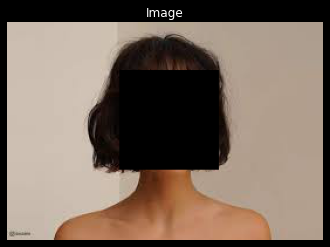

In [ ]:
image = face_img2
detected = detector.detect_multi_scale(img=image, scale_factor=1.2, step_ratio=1, min_size=(10,10), max_size=(100,100))

for d in detected:
    face = getFace(d)

    blurred_face = gaussian(face, multichannel=True, sigma=8)
    result_img = mergeBlurryFace(face_img2, blurred_face)

show_image(result_img)